![](https://s1.1zoom.me/big0/593/Holidays_Wine_Roses_Black_background_Bottle_540218_1280x853.jpg)

# Context
- The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

- These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

## Content
- Input variables (based on physicochemical tests):
   1 - fixed acidity

   2 - volatile acidity

   3 - citric acid

   4 - residual sugar

   5 - chlorides

   6 - free sulfur dioxide

   7 - total sulfur dioxide

   8 - density

   9 - pH

   10 - sulphates

   11 - alcohol

   Output variable (based on sensory data):

   12 - quality (score between 0 and 10)
   
   
## Acknowledgements
- This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality


 #### Info on columns:
 
- fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

- volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

- citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines.

- residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

- chlorides : the amount of salt in the wine.

- free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

- total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

- density : the density of water is close to that of water depending on the percent alcohol and sugar content.
 
- pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

- sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and  antioxidant.
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('C:/Users/user/Downloads/datasets_4458_8204_winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
max(df['pH']),min(df['pH'])

(4.01, 2.74)

In [ ]:
df[df['volatile acidity']>1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


In [ ]:
index=df[df['total sulfur dioxide']>165].index
index

Int64Index([1079, 1081], dtype='int64')

In [ ]:
df.drop(labels=index,inplace=True)

In [ ]:
df[df['residual sugar']>8][['residual sugar']]

,residual sugar
33,10.7
324,11.0
325,11.0
480,15.5
494,8.3
649,8.6
911,9.0
917,8.8
923,8.8
1043,8.9


In [ ]:
df[df['free sulfur dioxide']>50][['free sulfur dioxide']]

,free sulfur dioxide
14,52.0
15,51.0
396,68.0
400,68.0
584,54.0
925,53.0
926,52.0
982,51.0
1131,57.0
1244,72.0


In [ ]:
df[df['sulphates']>1][['sulphates']]

,sulphates
13,1.56
17,1.28
19,1.08
43,1.20
79,1.12
81,1.28
83,1.14
86,1.95
88,1.22
91,1.95


In [ ]:
df.shape

(1597, 12)

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


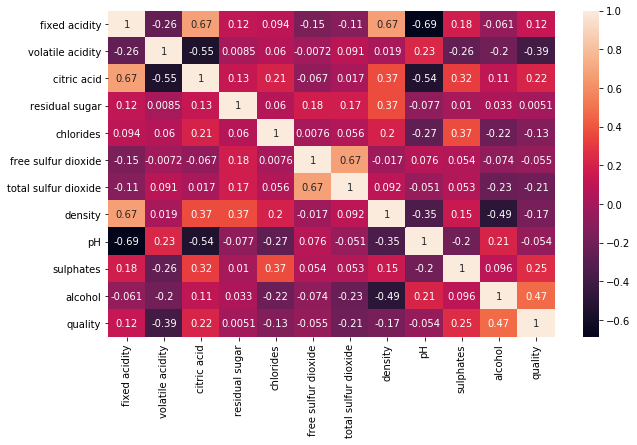

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Analysis

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


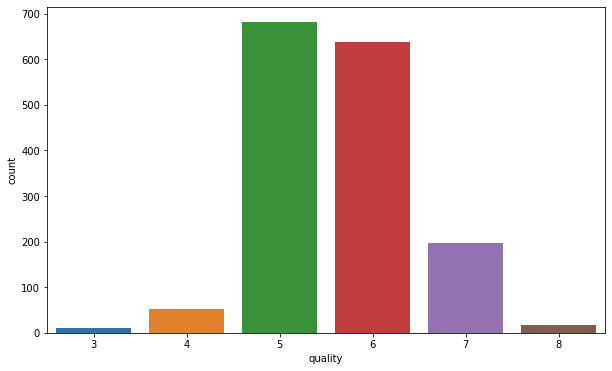

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['quality'])
plt.show()

- From above 5 and 6 are way far when compared to the other quality index.
- It was imbalanced 
- First we will apply the model and find the accuracies of the data before balancing it.

# Applying model on Imbalanced data

In [ ]:
X=df.iloc[:,:11] #IV
Y=df['quality']  #Dp


### Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:

from sklearn.metrics import roc_curve,auc,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
np.random.seed(0)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
    
    #Standardizing the independent column
sc=StandardScaler()
    # fitting the data into X_train and X_test
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)    

(1117, 11)
(480, 11)
(1117,)
(480,)


In [ ]:
def Algorithm(z,X_train,X_test,y_train,y_test):
   
    #Assinging the Classification Models
    z.fit(X_train,y_train)
    y_train_pred=z.predict(X_train)
    y_test_pred=z.predict(X_test)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,X_train,y_train,scoring='accuracy',cv=5)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(y_train,y_train_pred)
    testing_score = accuracy_score(y_test,y_test_pred)
    
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(y_train,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(y_test,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(y_train,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(y_test,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(y_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(y_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(y_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(y_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(y_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(y_test,y_test_pred,average=None))
    
    

In [ ]:
Algorithm(lr,X_train,X_test,y_train,y_test)

cv_score 0.5917480781550288
TRAINING SCORE 0.6096687555953447
TESTING SCORE 0.6083333333333333


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[  1   1   5   1   0   0]
 [  0   1  22  14   2   0]
 [  2   0 355 114   4   0]
 [  0   0 145 274  26   0]
 [  0   0  10  75  50   0]
 [  0   0   0   9   6   0]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[  0   0   2   0   0   0]
 [  0   0   9   5   0   0]
 [  0   1 155  48   2   0]
 [  0   1  56 118  18   0]
 [  0   0   1  42  19   0]
 [  0   0   0   1   2   0]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       0.33      0.12      0.18         8
           4       0.50      0.03      0.05        39
           5       0.66      0.75      0.70       475
           6       0.56      0.62      0.59       445
           7       0.57    

####  Calculating the Roc and plotting it

In [ ]:
Y=df['quality']
Y1=label_binarize(Y,classes=[5, 6, 7, 4, 8, 3])  
n_classes=Y1.shape[1]


In [ ]:
def roc_curves(x,y):
    
    np.random.seed(0)
    X_train, X_test, y_train, y_test =train_test_split(X, Y1, test_size=0.33, random_state=1)
    clf = OneVsRestClassifier(x)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

{0: 0.8179752066115703, 1: 0.6543399118605095, 2: 0.8448359407448429, 3: 0.6937255859375, 4: 0.8815453384418902, 5: 0.7758730158730159}


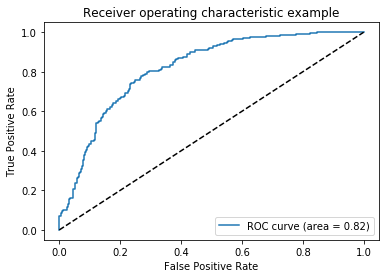

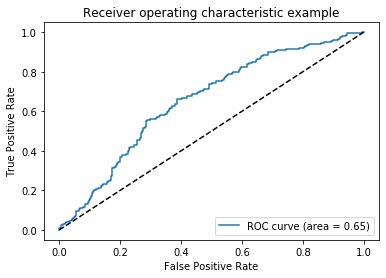

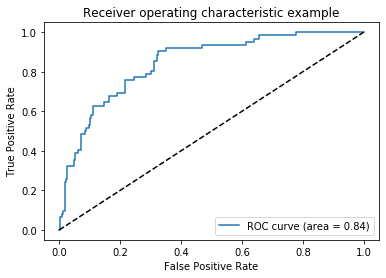

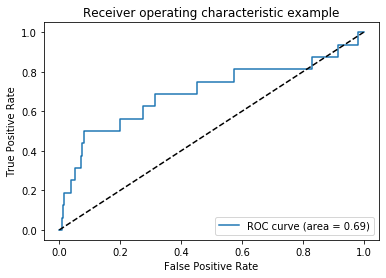

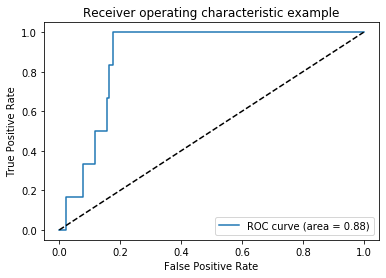

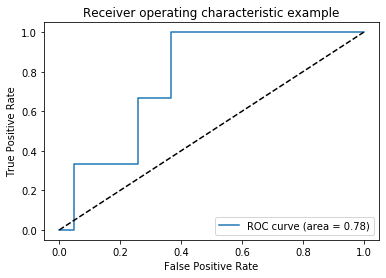

In [ ]:
roc_curves(lr,Y1)

# Balancing the data 

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=1)
X_res,Y_res=sm.fit_resample(X,Y)

In [ ]:
print(X_res.shape)
print(Y_res.shape)

(4086, 11)
(4086,)


In [ ]:
Y_res.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

##  Resampling

In [ ]:
import random
np.random.seed(0)
X1_train,X1_test,y1_train,y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=np.random.randint(30))

    #Standardizing the independent column
sc=StandardScaler()
    # fitting the data into X_train and X_test
X1_train=sc.fit_transform(X1_train)
X1_test=sc.fit_transform(X1_test)

In [ ]:
def Model(z,a,b,c,d):
    
    
    
    #fitting the data into X_train and Y_tra
    z.fit(X1_train,y1_train)
    y_train_pred=z.predict(X1_train)
    y_test_pred=z.predict(X1_test)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,X1_train,y1_train,scoring='accuracy',cv=5)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(y1_train,y_train_pred)
    testing_score = accuracy_score(y1_test,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(y1_train,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(y1_test,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(y1_train,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(y1_test,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(y1_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(y1_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(y1_test,y_test_pred,average=None))
    

In [ ]:
Model(lr,X1_train,X1_test,y1_train,y1_test)

cv_score 0.5923076923076923
TRAINING SCORE 0.6024475524475524
TESTING SCORE 0.5611745513866232


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[405  58   0   3   0   0]
 [ 68 274  73  59   5   0]
 [ 32  75 225  82  23   8]
 [  8  49  95 200  97  47]
 [  0  14   3  87 263 126]
 [  0   0   0   0 125 356]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[166  39   0  10   0   0]
 [ 20 109  29  42   2   0]
 [ 17  50 107  51   8   3]
 [  5  18  37  72  39  14]
 [  0   6   2  36  85  59]
 [  0   0   0   0  51 149]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       0.79      0.87      0.83       466
           4       0.58      0.57      0.58       479
           5       0.57      0.51      0.54       445
           6       0.46      0.40      0.43       496
           7       0.51    

In [ ]:
Y=df['quality']
Y1=label_binarize(Y_res,classes=[5, 6, 7, 4, 8, 3])
n_classes=Y1.shape[1]
range(n_classes)
np.random.seed(0)
X_train, X_test, y_train, y_test =train_test_split(X_res, Y1, test_size=0.33, random_state=1)

In [ ]:
def roc_curves(x,Y1):
    
    
    clf = OneVsRestClassifier(x)
    clf.fit(X_train, y_train)
    y_score=clf.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

{0: 0.8208936338473705, 1: 0.6837071392311598, 2: 0.8243155337807238, 3: 0.7155159235668789, 4: 0.9285263114720479, 5: 0.9749340369393139}


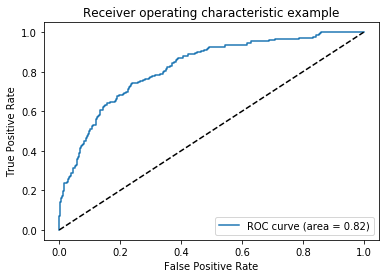

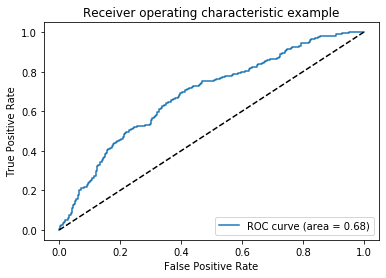

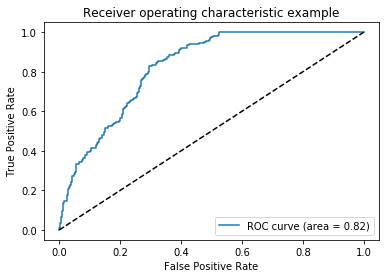

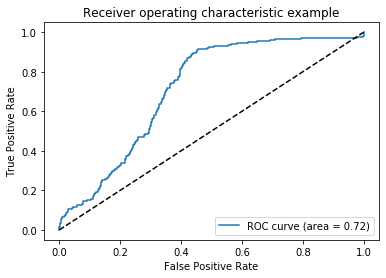

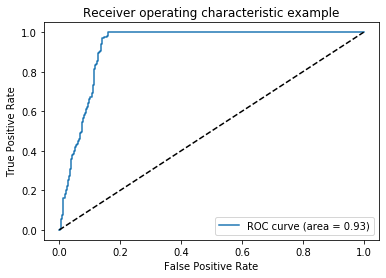

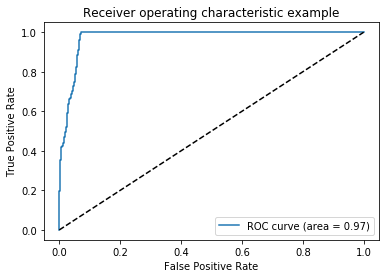

In [ ]:
roc_curves(lr,Y1)

## K Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()

In [ ]:
Model(Knn,X1_train,X1_test,y1_train,y1_test)

cv_score 0.7541958041958042
TRAINING SCORE 0.8391608391608392
TESTING SCORE 0.768352365415987


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[466   0   0   0   0   0]
 [  5 464   7   2   1   0]
 [ 16  65 272  76  13   3]
 [ 11  50  64 279  64  28]
 [  3   5   4  19 439  23]
 [  0   0   0   0   1 480]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[215   0   0   0   0   0]
 [  3 194   4   1   0   0]
 [  2  41 122  52  11   8]
 [  2  32  30  68  42  11]
 [  1   3   4  14 145  21]
 [  0   0   0   0   2 198]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       0.93      1.00      0.96       466
           4       0.79      0.97      0.87       479
           5       0.78      0.61      0.69       445
           6       0.74      0.56      0.64       496
           7       0.85     

{0: 0.8284163701067615, 1: 0.7376955558632148, 2: 0.9470336366256331, 3: 0.9403057324840765, 4: 0.9662913744309093, 5: 0.9858760226348716}


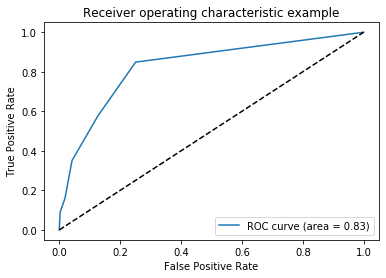

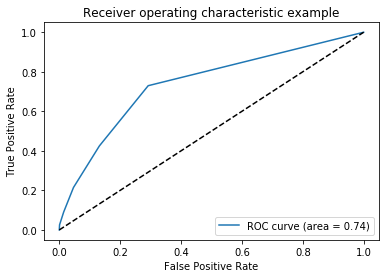

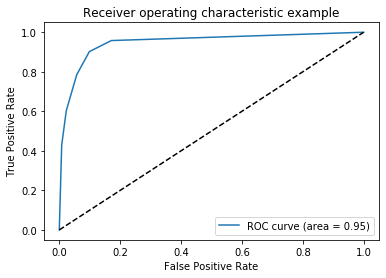

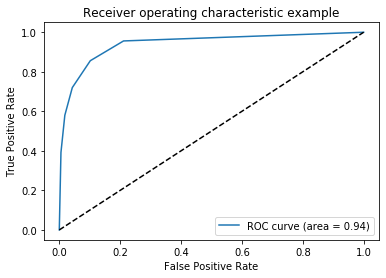

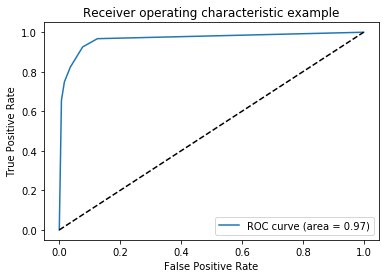

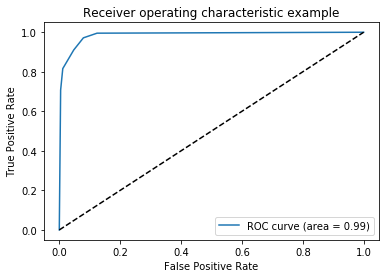

In [ ]:
roc_curves(Knn,Y1)

##  Finding the best K value

#  Either we can choose scoring or error rate

## Scoring rate

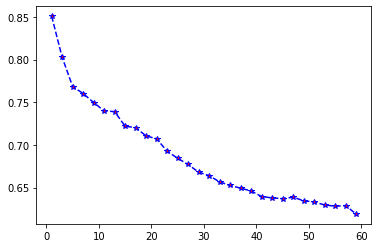

In [ ]:
scoring_rate=[]
for i in range(1,60,2):
    
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X1_train,y1_train)
    y_test_score=Knn.score(X1_test,y1_test)
    scoring_rate.append(y_test_score)
plt.figure()
plt.plot(range(1,60,2),scoring_rate,'b--',marker='*',markerfacecolor='red')
plt.show()

### Error Analysis

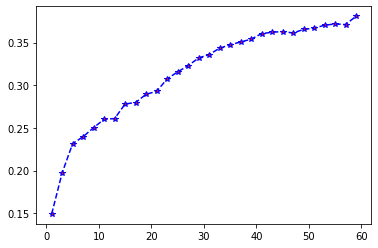

In [ ]:
#finding the error rate
error_rate=[]
for i in range(1,60,2):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X1_train,y1_train)
    y_test_pred=Knn.predict(X1_test)
    error_rate.append(np.mean(y_test_pred!=y1_test))
plt.figure()
plt.plot(range(1,60,2),error_rate,'b--',marker='*',markerfacecolor='red')
plt.show()

In [ ]:
#Taking K=1 with less errors
Knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
Model(Knn,X1_train,X1_test,y1_train,y1_test)

cv_score 0.8416083916083916
TRAINING SCORE 1.0
TESTING SCORE 0.8507340946166395


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[466   0   0   0   0   0]
 [  0 479   0   0   0   0]
 [  0   0 445   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0   0   0 481]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[215   0   0   0   0   0]
 [  0 199   3   0   0   0]
 [  1  19 148  54  13   1]
 [  0  16  31 105  27   6]
 [  0   0   4   3 177   4]
 [  0   0   0   0   1 199]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       479
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.0

{0: 0.7604191379992091, 1: 0.7261487224452751, 2: 0.9251163077936514, 3: 0.9127970882620564, 4: 0.9467966859439727, 5: 0.9705779857619355}


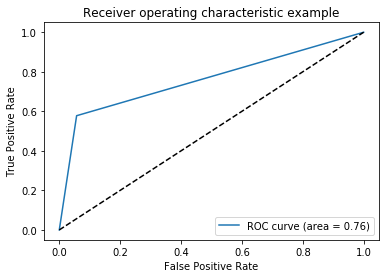

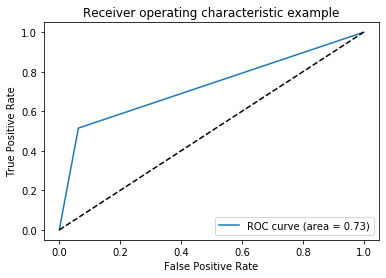

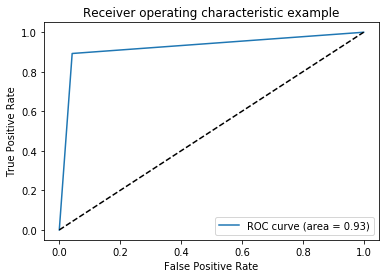

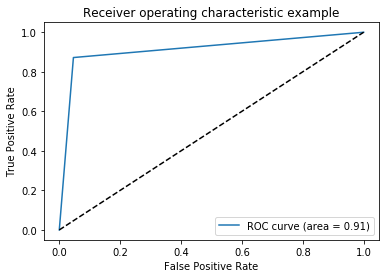

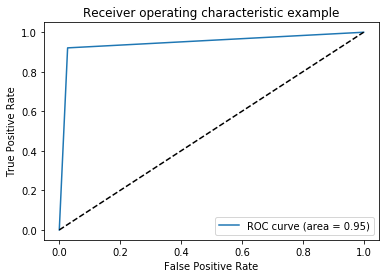

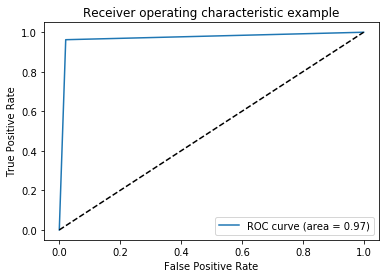

In [ ]:
roc_curves(Knn,Y1)

# Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
Model(dt,X1_train,X1_test,y1_train,y1_test)

cv_score 0.7643356643356642
TRAINING SCORE 1.0
TESTING SCORE 0.731647634584013


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[466   0   0   0   0   0]
 [  0 479   0   0   0   0]
 [  0   0 445   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0   0   0 481]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[199   2  13   0   1   0]
 [  3 162  16  13   8   0]
 [  4  28 135  56  11   2]
 [  3  15  38  92  26  11]
 [  0   2  11  17 141  17]
 [  0   0   1  13  18 168]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       479
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.00

{0: 0.7786397785686041, 1: 0.7328230036765271, 2: 0.8878669356498827, 3: 0.8497070063694268, 4: 0.9529695254501457, 5: 0.9683398051807969}


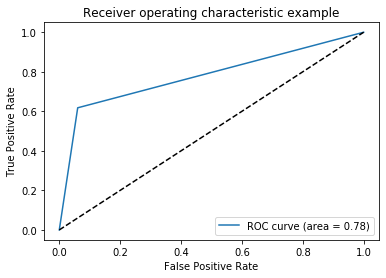

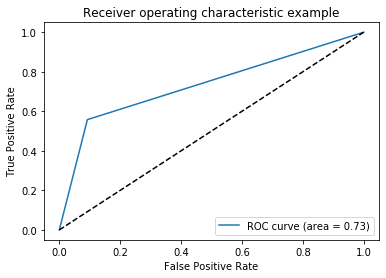

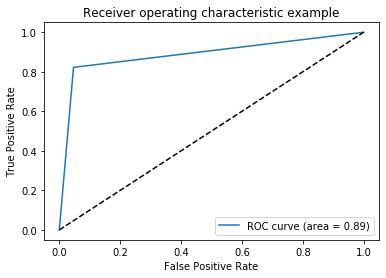

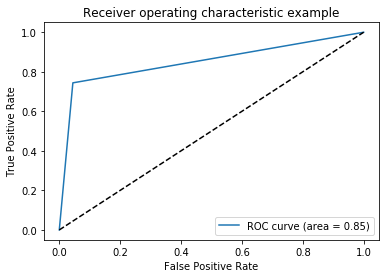

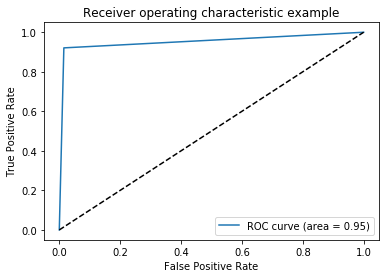

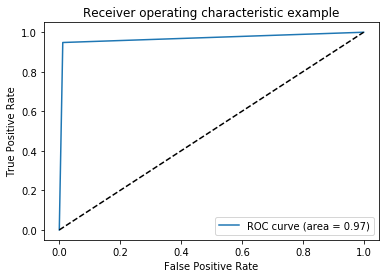

In [ ]:
roc_curves(dt,Y1)

##  Error Analysis

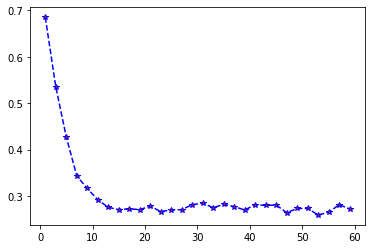

In [ ]:
#finding the error rate
error_rate=[]
for i in range(1,60,2):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X1_train,y1_train)
    y_test_pred=dt.predict(X1_test)
    error_rate.append(np.mean(y_test_pred!=y1_test))
plt.figure()
plt.plot(range(1,60,2),error_rate,'b--',marker='*',markerfacecolor='red')
plt.show()

In [ ]:
#MAx_depth=30
dt=DecisionTreeClassifier(max_depth=38)

In [ ]:
Model(dt,X1_train,X1_test,y1_train,y1_test)

cv_score 0.7685314685314685
TRAINING SCORE 1.0
TESTING SCORE 0.7308319738988581


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[466   0   0   0   0   0]
 [  0 479   0   0   0   0]
 [  0   0 445   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0   0   0 481]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[203   4   6   0   2   0]
 [  3 161  18  14   6   0]
 [  4  35 135  51   9   2]
 [  3  18  37  87  29  11]
 [  0   4  12  22 137  13]
 [  0   0   1  12  14 173]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       479
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.0

{0: 0.7861981020166073, 1: 0.7333652529727568, 2: 0.8986681213718144, 3: 0.8565222929936306, 4: 0.9538513596653131, 5: 0.9655415608768525}


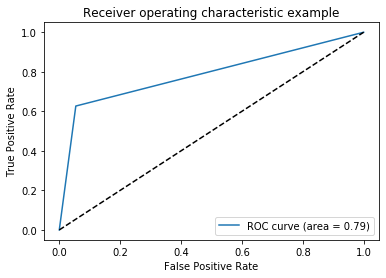

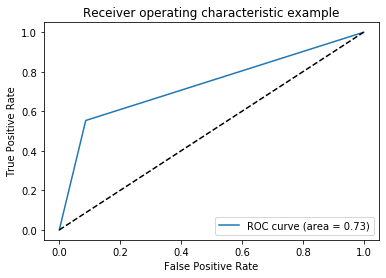

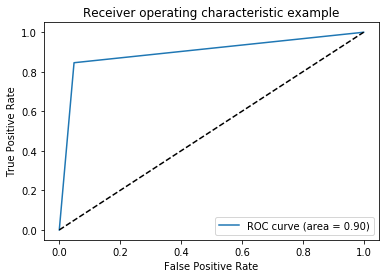

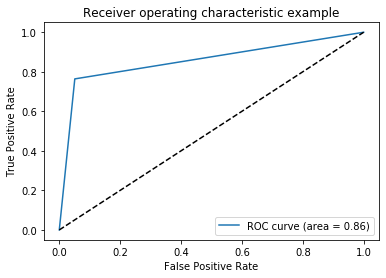

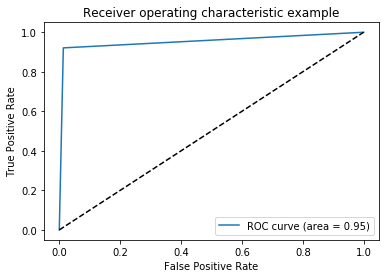

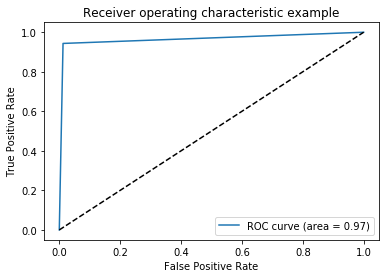

In [ ]:
roc_curves(dt,Y1)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
Model(rf,X1_train,X1_test,y1_train,y1_test)

cv_score 0.852097902097902
TRAINING SCORE 1.0
TESTING SCORE 0.8482871125611745


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[466   0   0   0   0   0]
 [  0 479   0   0   0   0]
 [  0   0 445   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0   0   0 481]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[215   0   0   0   0   0]
 [  0 195   4   3   0   0]
 [  4  21 158  49   4   0]
 [  2  13  23 114  27   6]
 [  0   0   3  14 164   7]
 [  0   0   0   0   6 194]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       479
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.00

{0: 0.9591775405298536, 1: 0.9364856861568754, 2: 0.9804911688418626, 3: 0.9939417652411283, 4: 0.999622656986998, 5: 0.9999481422478884}


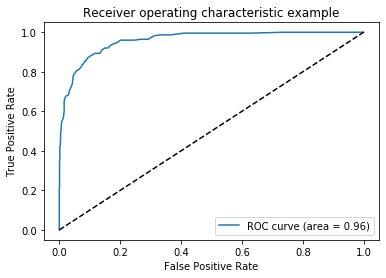

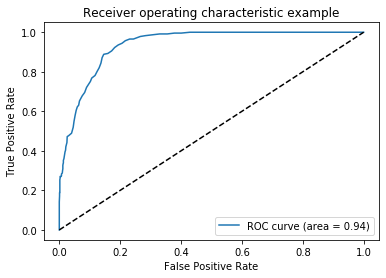

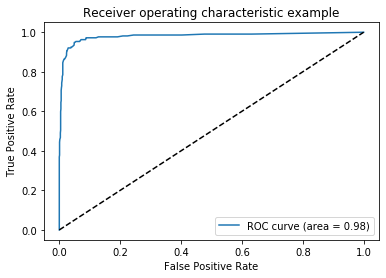

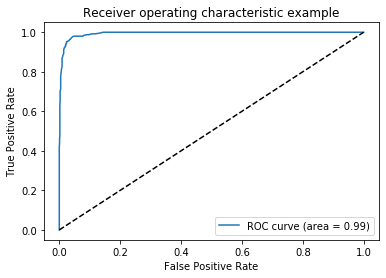

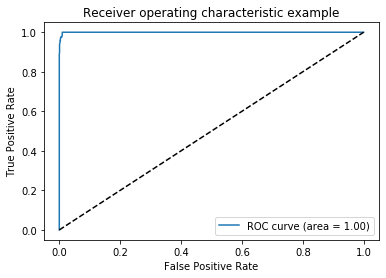

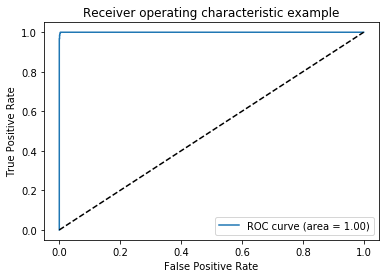

In [ ]:
roc_curves(rf,Y1)

### Making into a Dataframe and comparing them

In [ ]:
cv_score_lr = 0.5842657342657344
TRAINING_SCORE_lr = 0.5905594405594405
TESTING_SCORE_lr=0.5995106035889071


cv_score_Knn= 0.8342657342657341
TRAINING_SCORE_Knn= 1.0
TESTING_SCORE_Knn =0.8303425774877651

cv_score_dt= 0.7468531468531469
TRAINING_SCORE_dt =1.0
TESTING_SCORE_dt= 0.7471451876019576

cv_score_rf =0.8447552447552449
TRAINING_SCORE_rf= 1.0
TESTING_SCORE_rf =0.8523654159869495

In [ ]:
models=[('Logistic Regression',cv_score_lr,TRAINING_SCORE_lr,TESTING_SCORE_lr),
       ('KNeighbours',cv_score_Knn,TRAINING_SCORE_Knn,TESTING_SCORE_Knn),
       ('Decision Tree',cv_score_dt,TRAINING_SCORE_dt,TESTING_SCORE_dt),
       ('Random Forest',cv_score_rf,TRAINING_SCORE_rf,TESTING_SCORE_rf)]

In [ ]:
predictions=pd.DataFrame(data=models,columns=['Model','Cv_Scores','Training_Score','Testing_score'])
predictions

,Model,Cv_Scores,Training_Score,Testing_score
0,Logistic Regression,0.584266,0.590559,0.599511
1,KNeighbours,0.834266,1.000000,0.830343
2,Decision Tree,0.746853,1.000000,0.747145
3,Random Forest,0.844755,1.000000,0.852365


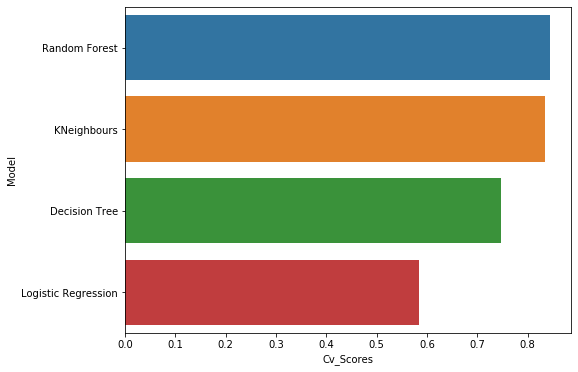

In [ ]:
plt.figure(figsize=(8,6))
predictions.sort_values(by=['Cv_Scores'],ascending=False,inplace=True)
sns.barplot(x='Cv_Scores',y='Model',data=predictions)
plt.show()

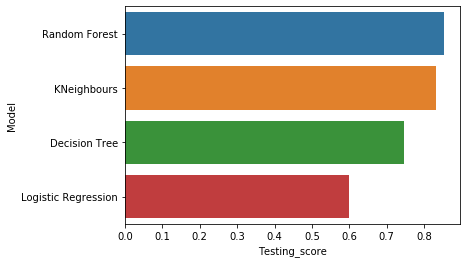

In [ ]:
sns.barplot(predictions['Testing_score'],predictions['Model'])

## Feature Importance

In [ ]:
np.random.seed(0)
X1_train,X1_test,y1_train,y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=np.random.randint(30))
rf=RandomForestClassifier()
rf.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f_imp=rf.feature_importances_

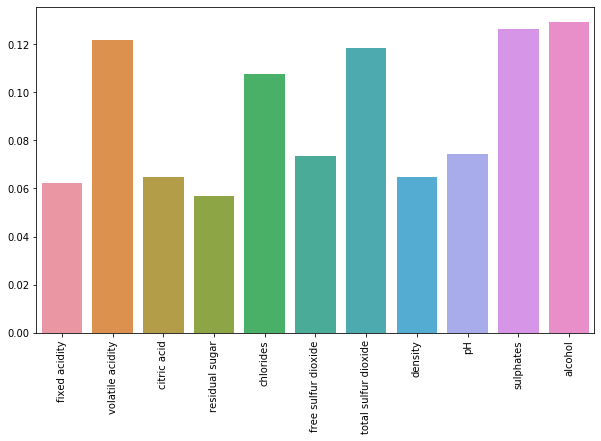

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(X1_train.columns,f_imp)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sorted_idx=np.argsort(f_imp)

In [ ]:
X1_train.columns[sorted_idx]

Index(['residual sugar', 'fixed acidity', 'citric acid', 'density',
       'free sulfur dioxide', 'pH', 'chlorides', 'total sulfur dioxide',
       'volatile acidity', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
f_imp[sorted_idx]

array([0.05700794, 0.06213275, 0.0645918 , 0.06472782, 0.07364764,
       0.07415569, 0.10775323, 0.1184615 , 0.12190754, 0.12637307,
       0.12924102])

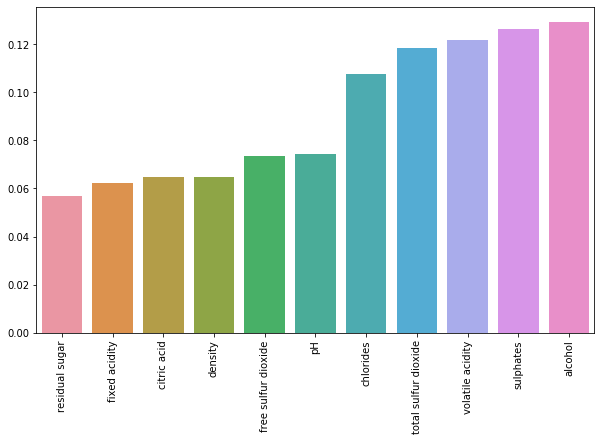

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(X1_train.columns[sorted_idx],f_imp[sorted_idx])
plt.xticks(rotation= 90)
plt.show()

## RFE

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=rf,n_features_to_select=6)
rfe1=rfe.fit(X1_train,y1_train)

In [ ]:
rfe1.support_

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True])

In [ ]:
list(zip(X1_train.columns,rfe1.support_,rfe1.ranking_))

[('fixed acidity', False, 6),
 ('volatile acidity', True, 1),
 ('citric acid', False, 4),
 ('residual sugar', False, 5),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 3),
 ('total sulfur dioxide', True, 1),
 ('density', False, 2),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [ ]:
rfe1.ranking_

array([6, 1, 4, 5, 1, 3, 1, 2, 1, 1, 1])

In [ ]:
features=[]
for i,j in enumerate(rfe1.ranking_):
    if j==1:
        features.append(X1_train.columns[i])

In [ ]:
print(features)

['volatile acidity', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']


## Now we got the best features and apply Random forest on the model

In [ ]:
print(X_res.shape)


(4086, 11)


In [ ]:
X_res=X_res[features]
print(X_res.shape)

(4086, 6)


In [ ]:
Y_res

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

#### Applying rf

In [ ]:
np.random.seed(0)
X1_train,X1_test,y1_train,y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=np.random.randint(30))
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(2860, 6)
(1226, 6)
(2860,)
(1226,)


In [ ]:

rf1=RandomForestClassifier()


In [ ]:
def Model(z,a,b,c,d):
    
    
    
    #fitting the data into X_train and Y_tra
    z.fit(X1_train,y1_train)
    y_train_pred=z.predict(X1_train)
    y_test_pred=z.predict(X1_test)
    print(X1_train.shape)
    
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,X1_train,y1_train,scoring='accuracy',cv=5)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(y1_train,y_train_pred)
    testing_score = accuracy_score(y1_test,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(y1_train,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(y1_test,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(y1_train,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(y1_test,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(y1_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(y1_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(y1_test,y_test_pred,average=None))
    

In [ ]:
Model(rf1,X1_train,X1_test,y1_train,y1_test)

(2860, 6)
cv_score 0.8325174825174825
TRAINING SCORE 1.0
TESTING SCORE 0.8344208809135399


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[466   0   0   0   0   0]
 [  0 479   0   0   0   0]
 [  0   0 445   0   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   0 493   0]
 [  0   0   0   0   0 481]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[214   1   0   0   0   0]
 [  5 186   4   7   0   0]
 [  2  17 165  48   4   0]
 [  1  19  27 103  30   5]
 [  0   2   4  17 160   5]
 [  0   0   0   0   5 195]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       479
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       496
           7       1.00      1.0

# Grid Search CV

In [ ]:
parameterts={'n_estimators':[10,30,50,100],
    'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50,2),
    'max_features':[2,3]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gridsearch=GridSearchCV(estimator=rf1,param_grid=parameterts)

In [ ]:
import time
start=time.time()
gridsearch.fit(X1_train,y1_train)
print(X1_train.shape)
end=time.time()
print('Total time taken is',end-start)


KeyboardInterrupt: 

In [ ]:
gridsearch.best_params_

# After Grid search

In [ ]:
rf2=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=48,max_features=2)

In [ ]:
np.random.seed(0)
rf2.fit(X1_train,y1_train)


In [ ]:
y_test_pred=rf2.predict(X1_test)
accuracy_score(y1_test,y_test_pred)


In [ ]:
Model(rf2,X1_train,X1_test,y1_train,y1_test)